In [125]:
import math
Omega = (9.5)*(10**3)
R = 1.7
R_crit = 10.5
frequency = 1.9*(10**3)
Eo = 0.3

In [126]:
L = R_crit/(2*Omega)
C = 2/(R_crit*Omega)
hamma = (Omega*R)/R_crit
Q = math.pi*frequency/(hamma)
omega_res = Omega
I_o_max_vid_omega_res = Eo/(2*L*Omega*R/R_crit)
print("Індуктивність: L = ",L)
print("Ємність: C = ", C)
print("Коефіцієнт затухання: hamma = ", hamma)
print("Резонансна колова частота: ",omega_res)
print("Максимальна амплітуда струму: ",I_o_max_vid_omega_res)

Індуктивність: L =  0.0005526315789473684
Ємність: C =  2.0050125313283208e-05
Коефіцієнт затухання: hamma =  1538.095238095238
Резонансна колова частота:  9500.0
Максимальна амплітуда струму:  0.17647058823529413


[372 534]
омега мале_1: 8.084584584584587
омега мале_2: 11.165665665665667
w: 1.0 Io_ot_omega_maloe(w): 6.078823277481849 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.019019019019019 Io_ot_omega_maloe(w): 6.196958367882302 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.038038038038038 Io_ot_omega_maloe(w): 6.315238017895924 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.057057057057057 Io_ot_omega_maloe(w): 6.433665117044946 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.0760760760760761 Io_ot_omega_maloe(w): 6.552242565778182 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.095095095095095 Io_ot_omega_maloe(w): 6.670973275699775 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.1141141141141142 Io_ot_omega_maloe(w): 6.789860169799601 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.1331331331331331 Io_ot_omega_maloe(w): 6.908906182685312 Io_ot_omega_maloe(w)_max/sqrt(2): 124.78349017230207
w: 1.1521521521521523 Io

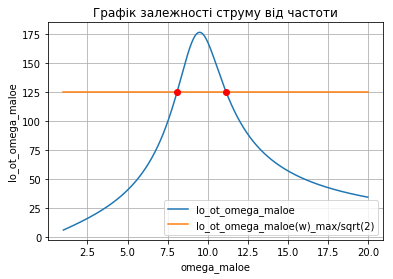

In [127]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
omega_maloe = np.linspace(1, 20,1000) #для інших варіантів потрібно змініти друге значення і третє для точних розрахунків

#linspace - масив даних: перший і другий параметри це початкові і кінцеві значення вибірки, третій параметр - кількість значень.

Io_ot_omega_maloe = ((Eo/L)*1/((2*Omega*R/R_crit)**2 +(Omega**2/(omega_maloe*(10**3)) - omega_maloe*(10**3))**2 )**0.5)*(10**3)
t = ( max(Io_ot_omega_maloe))/(2**0.5)*(omega_maloe/omega_maloe)

#t - фінкція І = max(Io_ot_omega_maloe))/(2**0.5)

idx = np.argwhere(np.diff(np.sign(Io_ot_omega_maloe - t )) != 0).reshape(-1)

#argwhere(array=*/>< y)функція яка будує масив де елементи вхідного масиву відповідать умові що задана в аргументі argwhere
#sign - сигнум функція

#reshape(-1) - робить одновимірний масив

plt.xlabel('omega_maloe')
plt.ylabel('Io_ot_omega_maloe')
plt.title("Графік залежності струму від частоти")
plt.plot(omega_maloe, Io_ot_omega_maloe)
plt.plot(omega_maloe, t)
for i in range(len(idx)):
    plt.plot((omega_maloe[idx[i]]+omega_maloe[idx[i]+1])/2,(t[idx[i]]+t[idx[i]+1])/2, 'ro')

print(idx)
print("омега мале_1:",(omega_maloe[idx[0]]+omega_maloe[idx[0]+1])/2)
print("омега мале_2:",(omega_maloe[idx[1]]+omega_maloe[idx[1]+1])/2)
plt.grid()
for i in range(0,20):
    print("w:",omega_maloe[i],"Io_ot_omega_maloe(w):",Io_ot_omega_maloe[i],"Io_ot_omega_maloe(w)_max/sqrt(2):",t[i])
plt.legend(['Io_ot_omega_maloe', 'Io_ot_omega_maloe(w)_max/sqrt(2)'])
plt.show()

In [129]:
Delta_omega = (omega_maloe[idx[1]]+omega_maloe[idx[1]+1])/2 - (omega_maloe[idx[0]]+omega_maloe[idx[0]+1])/2
Q_zirochka = Omega/(Delta_omega*(10**3))
Q_teoretychne = Omega/(2*hamma)
pohybka = 100*(Q_teoretychne - Q_zirochka)/Q_teoretychne
print("Дельта омега мале:",Delta_omega)
print("Експериментальне значення добротності: ",Q_zirochka)
print("Теоретичне значення добротності: ",Q_teoretychne)
print("Похибка: ",pohybka, "%")

Дельта омега мале: 3.0810810810810807
Експериментальне значення добротності:  3.0833333333333335
Теоретичне значення добротності:  3.088235294117647
Похибка:  0.15873015873015817 %


In [130]:
z = ( R**2 +( 2*math.pi*frequency*L  - 1/(2*math.pi*frequency*C)  )**2    )**0.5
print("Імпеданс контура на частоті мю: ",z, "Ом")

Імпеданс контура на частоті мю:  2.9570445439139337 Ом


In [131]:
tg_fi = (1/R)*(2*math.pi*frequency*L  - 1/(2*math.pi*frequency*C))
fi = math.atan(tg_fi)
print("Тангенс фі: ", tg_fi)
print("Кут фі: ", fi*180/math.pi,"градусів")

Тангенс фі:  1.423251362574302
Кут фі:  54.907486795846374 градусів


In [132]:
I_g = ( max(Io_ot_omega_maloe))/(2**0.5)
Epsulon_g = Eo/(2**0.5)
P = Epsulon_g*I_g*math.cos(math.radians(fi*180/math.pi))*(10**-3)
print("Діюче значення І_g: ", I_g,"мА")
print("Діюче значення Епсулон_g: ", Epsulon_g,"B")
print("Потужність, що споживає контур: ", P,"Bт")

Діюче значення І_g:  124.78349017230207 мА
Діюче значення Епсулон_g:  0.21213203435596423 B
Потужність, що споживає контур:  0.015217889988808764 Bт


In [133]:
U_L_max = max(Io_ot_omega_maloe)*(10**-3)*2*math.pi*frequency*L
U_C_max = max(Io_ot_omega_maloe)*(10**-3)/(2*math.pi*frequency*C)
U_R_max = R_crit*max(Io_ot_omega_maloe)*(10**-3)
print("Числове значення для ІНДУКТИВНОСТІ: ",U_L_max, "B")
print("Числове значення для ЄМНОСТІ: ", U_C_max, "B")
print("Числове значення для АКТИВНОГО ОПОРУ: ", U_R_max, "B")

Числове значення для ІНДУКТИВНОСТІ:  1.1642367228457833 B
Числове значення для ЄМНОСТІ:  0.7372615174913196 B
Числове значення для АКТИВНОГО ОПОРУ:  1.852940293700154 B


In [134]:
Epsulon_C_ot_omega_maloe = Eo*(R_crit**2)/(   2*R*( 2*(R_crit**2) - 2*R*R  )**0.5    )
print("Залежність амплітуди напруги на конденсаторі від колової частоти генератора: ",Epsulon_C_ot_omega_maloe,"B")

Залежність амплітуди напруги на конденсаторі від колової частоти генератора:  0.6638725116198055 B


In [135]:
omega_shtruh_maloe =Omega*( (  1 - 2*R*R/(R_crit*R_crit) )**0.5 )
print("Омега штрих мале: ",omega_shtruh_maloe, "Гц")
print("Відношення омега штрих мале до омега велике нульве: ",100*omega_shtruh_maloe/Omega ,"%")
print("Відрізняється на: ", 100 - 100*omega_shtruh_maloe/Omega,"%")

Омега штрих мале:  9247.622725711592 Гц
Відношення омега штрих мале до омега велике нульве:  97.34339711275359 %
Відрізняється на:  2.6566028872464074 %


омега мале_1: 7.523758758758758
омега мале_2: 10.685340340340339
w: 0.01 Epsulon(w): 300.0003149832581 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.03001001001001001 Epsulon(w): 300.0028367639186 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.05002002002002002 Epsulon(w): 300.00788107614056 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.07003003003003003 Epsulon(w): 300.0154481599425 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.09004004004004003 Epsulon(w): 300.0255383753998 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.11005005005005004 Epsulon(w): 300.0381522026861 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.13006006006006005 Epsulon(w): 300.053290242125 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.15007007007007006 Epsulon(w): 300.0709532142579 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.17008008008008008 Epsulon(w): 300.09114195992305 Epsulon(w)_max/sqrt(2): 663.8658129095387
w: 0.1900900900900901 Epsulon(w): 300.1138574403495 Epsulon(w)_max/sqrt(2): 663.8658129095387


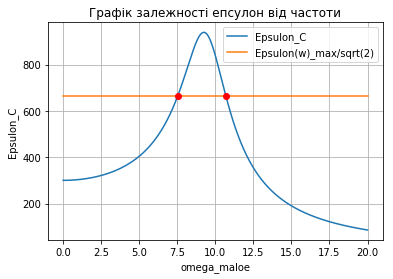

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
omega_maloe = np.linspace(0.01, 20, 1000) #для інших варіантів потрібно змініти друге значення і третє для точних розрахунків
Epsulon_C = ((  Eo/(omega_maloe*(10**3)*L*C)   )*1/(   (2*Omega*R/R_crit)**2 +    (Omega**2/(omega_maloe*(10**3)) - omega_maloe*(10**3))**2 )**0.5)*(10**3)
t = ( max(Epsulon_C))/(2**0.5)*(omega_maloe/omega_maloe)
idx = np.argwhere(np.diff(np.sign(Epsulon_C - t )) != 0).reshape(-1) + 0
plt.xlabel('omega_maloe')
plt.ylabel('Epsulon_C')
plt.title("Графік залежності епсулон від частоти")
plt.plot(omega_maloe, Epsulon_C)
plt.plot(omega_maloe, t)
for i in range(len(idx)):
    plt.plot((omega_maloe[idx[i]]+omega_maloe[idx[i]+1])/2,(t[idx[i]]+t[idx[i]+1])/2, 'ro')

print("омега мале_1:",(omega_maloe[idx[0]]+omega_maloe[idx[0]+1])/2)
print("омега мале_2:",(omega_maloe[idx[1]]+omega_maloe[idx[1]+1])/2)
plt.grid()
for i in range(0,20):
    print("w:",omega_maloe[i],"Epsulon(w):",Epsulon_C[i],"Epsulon(w)_max/sqrt(2):",t[i])
plt.legend(['Epsulon_C', 'Epsulon(w)_max/sqrt(2)'])
plt.show()

In [139]:
Delta_omega = (omega_maloe[idx[1]]+omega_maloe[idx[1]+1])/2 - (omega_maloe[idx[0]]+omega_maloe[idx[0]+1])/2
Q_zirochka = Omega/(Delta_omega*(10**3))
Q_teoretychne = Omega/(2*hamma)
pohybka = 100*(Q_teoretychne - Q_zirochka)/Q_teoretychne
print("Дельта омега мале:",Delta_omega)
print("Експериментальне значення добротності: ",Q_zirochka)
print("Теоретичне значення добротності: ",Q_teoretychne)
print("Похибка: ",pohybka, "%")

Дельта омега мале: 3.161581581581581
Експериментальне значення добротності:  3.0048251974088314
Теоретичне значення добротності:  3.088235294117647
Похибка:  2.7008983696187983 %
